In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
X = load_boston().data
y = load_boston().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [6]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
clf = SGDRegressor(penalty='none', shuffle=False)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
mse_sk_sgd_train = mean_squared_error(y_train, y_train_pred)
mse_sk_sgd_test = mean_squared_error(y_test, y_test_pred)
print("MSE for Train data: ",mse_sk_sgd_train)
print("MSE for Test data: ",mse_sk_sgd_test)

MSE for Train data:  25.333685459351482
MSE for Test data:  19.842444385817814


In [8]:
class ImplementedSGD:
    def __init__(self, k = None, rate = None, epochs = None):
        self.__k = k or 20 #k random points for SGD; default 20
        self.__rate = rate or 1
        self.__epochs = epochs or 100 #k random points for SGD; default 20
    
    def __get_k_random_points(self, n, k):
        #get k random points out of n point
        return list(np.random.randint(1, n, k))
    
    def fit(self, X_train, y_train):        
        ones = np.ones([X_train.shape[0],1])
        X_train = np.concatenate((ones,X_train),axis=1)
        y_train = y_train.reshape(-1,1)
        
        points = self.__get_k_random_points(X_train.shape[0], self.__k)
        X_subset = []
        y_subset = []
        for point in points:
            X_subset.append(X_train[point])
            y_subset.append(y_train[point])
        X_subset = np.array(X_subset)
        y_subset = np.array(y_subset)
        
        weights = np.zeros([1,X_subset.shape[1]])
        cost = np.zeros(self.__epochs)
        
        for i in range(self.__epochs):
            weights = weights - (self.__rate/len(X_subset)) * np.sum(X_subset * (X_subset @ weights.T - y_subset), axis=0)
            self.coef_ = weights[0][1:]
            self.intercept_ = weights[0][0]            
            self.__rate/=2
        
        
    def predict(self, X_test):
        y_pred = (X_test @ self.coef_.T) + self.intercept_
        return y_pred    

In [67]:
sgd = ImplementedSGD(k = 200, epochs = 1000)

In [68]:
sgd.fit(X_train,y_train)

In [69]:
clf.coef_

array([-0.5427566 ,  0.47887576, -0.519181  ,  0.35694902, -0.76176404,
        3.55192615,  0.08901093, -1.92123473,  0.80609205, -0.31470901,
       -1.8844215 ,  0.67963157, -3.28840346])

In [70]:
sgd.coef_

array([-0.85965456,  1.07689507, -1.03603857,  0.81464741, -0.19285659,
        3.769744  , -0.15455252, -1.95379726,  0.66740048, -0.40784778,
       -1.32609774,  0.89752327, -4.30186033])

In [71]:
y_train_sgd_pred = sgd.predict(X_train)
y_test_sgd_pred = sgd.predict(X_test)
mse_sgd_train = mean_squared_error(y_train, y_train_sgd_pred)
mse_sgd_test = mean_squared_error(y_test, y_test_sgd_pred)
print("MSE for Train data: ",mse_sgd_train)
print("MSE for Test data: ",mse_sgd_test)

MSE for Train data:  26.692639137083287
MSE for Test data:  21.587601479522316


### Plotting results

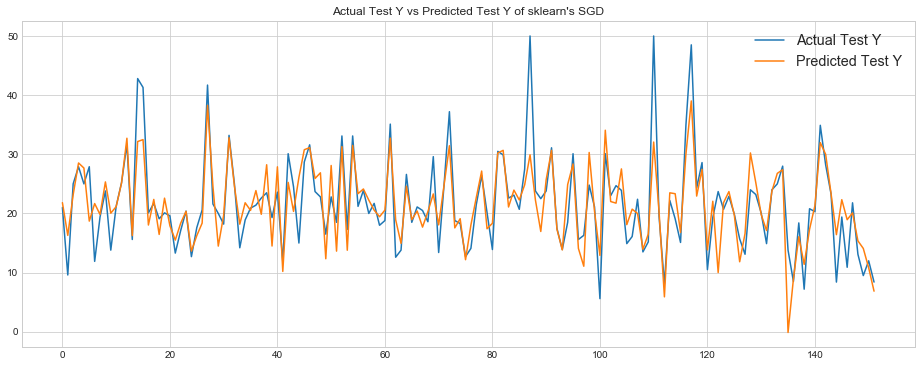

In [80]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.plot(y_test, label='Actual Test Y')
plt.plot(y_test_pred, label='Predicted Test Y')
plt.title("Actual Test Y vs Predicted Test Y of sklearn's SGD")
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

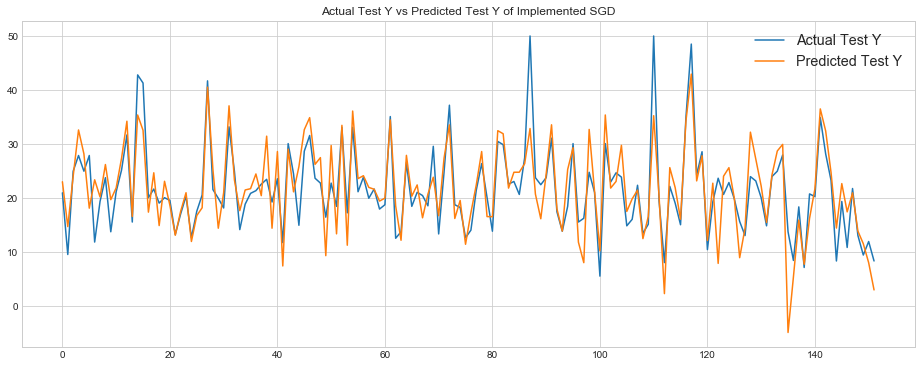

In [81]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.plot(y_test, label='Actual Test Y')
plt.plot(y_test_sgd_pred, label='Predicted Test Y')
plt.title("Actual Test Y vs Predicted Test Y of Implemented SGD")
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

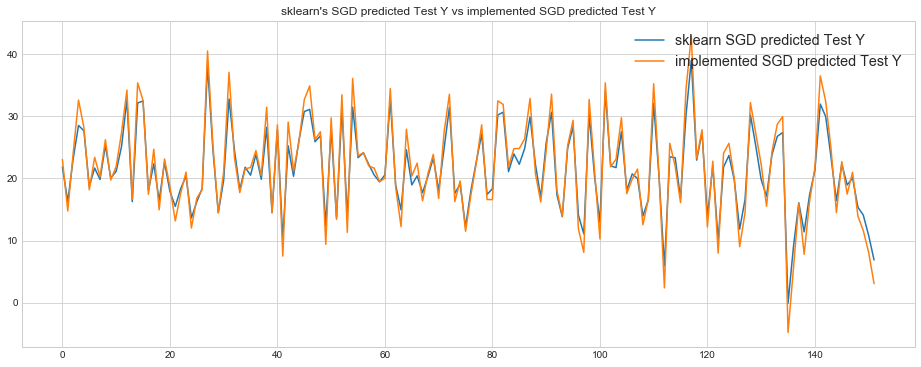

In [77]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.plot(y_test_pred, label='sklearn SGD predicted Test Y')
plt.plot(y_test_sgd_pred, label='implemented SGD predicted Test Y')
plt.title("sklearn's SGD predicted Test Y vs implemented SGD predicted Test Y")
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

In [82]:
df_weights = pd.DataFrame({'Weights from Sklearn SGD':clf.coef_,'Weights from implemented SGD':sgd.coef_})
df_weights

,Weights from Sklearn SGD,Weights from implemented SGD
0,-0.542757,-0.859655
1,0.478876,1.076895
2,-0.519181,-1.036039
3,0.356949,0.814647
4,-0.761764,-0.192857
5,3.551926,3.769744
6,0.089011,-0.154553
7,-1.921235,-1.953797
8,0.806092,0.667400
9,-0.314709,-0.407848


In [83]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Training MSE from Sklearn SGD", "Training MSE from implemented SGD"]
x.add_row([mse_sk_sgd_train, mse_sgd_train])
print(x)

+-------------------------------+-----------------------------------+
| Training MSE from Sklearn SGD | Training MSE from implemented SGD |
+-------------------------------+-----------------------------------+
|       25.333685459351482      |         26.692639137083287        |
+-------------------------------+-----------------------------------+


In [84]:
x = PrettyTable()
x.field_names = ["Test MSE from Sklearn SGD", "Test MSE from implemented SGD"]
x.add_row([mse_sk_sgd_test, mse_sgd_test])
print(x)

+---------------------------+-------------------------------+
| Test MSE from Sklearn SGD | Test MSE from implemented SGD |
+---------------------------+-------------------------------+
|     19.842444385817814    |       21.587601479522316      |
+---------------------------+-------------------------------+
